> 多層感知機是⼀一種前向傳遞類神經網路路，⾄至少包含三層結構(輸入層、隱藏層和輸出層)，並且利利⽤用到「倒傳遞」的技術達到學習(model learning)的監督式學習，以上是傳統的定義。現在深度學習的發展，其實MLP是深度神經網路路(deep neural network, DNN)的⼀一種special case，概念念基本上⼀一樣，DNN只是在學習過程中多了了⼀一些⼿手法和層數會更更多更更深。

<img src="imgs/Rosenblatt's perceptron.png" width="90%">
<img src="imgs/Muti_layer perceptron.png" width="80%">

# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)# 資料預處理

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_train_image.shape

(60000, 28, 28)

In [4]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 111us/sample - loss: 0.2653 - accuracy: 0.9235 - val_loss: 0.1303 - val_accuracy: 0.9626
Epoch 2/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.1066 - accuracy: 0.9685 - val_loss: 0.0979 - val_accuracy: 0.9701
Epoch 3/10
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0699 - accuracy: 0.9789 - val_loss: 0.0870 - val_accuracy: 0.9714
Epoch 4/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0921 - val_accuracy: 0.9722
Epoch 5/10
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0846 - val_accuracy: 0.9752
Epoch 6/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0931 - val_accuracy: 0.9743
Epoch 7/10
48000/48000 [=============================

# 以圖形顯示訓練過程

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

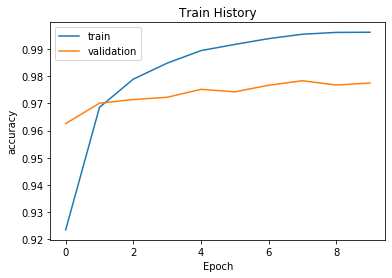

In [11]:
show_train_history(train_history,'accuracy','val_accuracy')

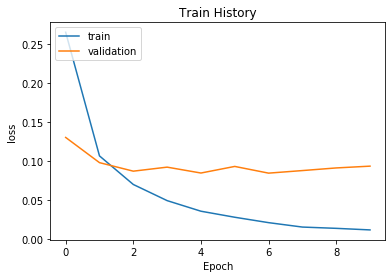

In [12]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [13]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0791 - accuracy: 0.9797

accuracy= 0.9797


# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


In [14]:
model=Sequential()
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=256,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=256,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history_add =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 151us/sample - loss: 0.2338 - accuracy: 0.9295 - val_loss: 0.1307 - val_accuracy: 0.9600
Epoch 2/10
48000/48000 [==============================] - 7s 149us/sample - loss: 0.0983 - accuracy: 0.9700 - val_loss: 0.1340 - val_accuracy: 0.9615
Epoch 3/10
48000/48000 [==============================] - 8s 160us/sample - loss: 0.0703 - accuracy: 0.9787 - val_loss: 0.1026 - val_accuracy: 0.9717
Epoch 4/10
48000/48000 [==============================] - 7s 154us/sample - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.1004 - val_accuracy: 0.9742
Epoch 5/10
48000/48000 [==============================] - 7s 145us/sample - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.1138 - val_accuracy: 0.9724
Epoch 6/10
48000/48000 [==============================] - 7s 143us/sample - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0998 - val_accuracy: 0.9762
Epoch 7/10
48000/48000 [==========================

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 57us/sample - loss: 0.0861 - accuracy: 0.9794

accuracy= 0.9794


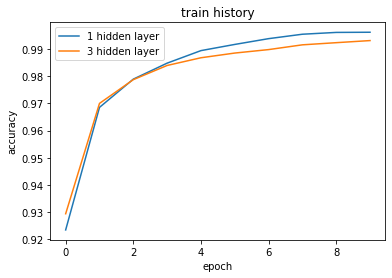

In [18]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history_add.history['accuracy'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1 hidden layer','3 hidden layer'],loc='upper left')
plt.show()

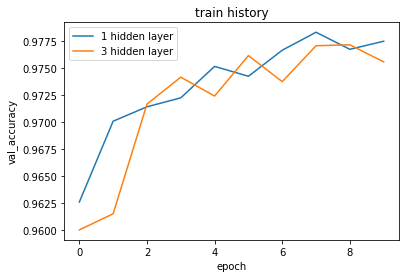

In [19]:
plt.plot(train_history.history['val_accuracy'])
plt.plot(train_history_add.history['val_accuracy'])
plt.title('train history')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['1 hidden layer','3 hidden layer'],loc='upper left')
plt.show()

## 優化函數(Optimizer)
#### 隨機梯度下降法(Stochastic Gradient Descent, SGD)：就是利用偏微分，逐步按著下降的方向，尋找最佳解。它含以下參數：

- Learning Rate (lr)：逼近最佳解的學習速率，速率訂的太小，計算最佳解的時間花費較長，訂的太大，可能會在最佳解兩旁擺盪，找不到最佳解。
- momentum：更新的動能，一開始學習速率可以大一點，接近最佳解時，學習速率步幅就要小一點，一般訂為0.5，不要那麼大時，可改為 0.9。
- decay：每次更新後，學習速率隨之衰減的比率。
- nesterov：是否使用 Nesterov momentum。

#### Adam：一般而言，比SGD模型訓練成本較低，請參考『Adam - A Method for Stochastic Optimization』，包含相關參數建議值，含以下參數：

- lr：逼近最佳解的學習速率，預設值為0.001。
- beta_1：一階矩估計的指數衰減因子，預設值為0.9。
- beta_2：二階矩估計的指數衰減因子，預設值為0.999。
- epsilon：為一大於但接近 0 的數，放在分母，避免產生除以 0 的錯誤，預設值為1e-08。
- decay：每次更新後，學習速率隨之衰減的比率。
- 其他優化函數請參考[官方文件](https://keras.io/optimizers/)。